<a href="https://colab.research.google.com/github/AyakaKamata/Young-T-core/blob/main/Young_t_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ヤング図形のt-coreを求める
ヤング図形からサイズtのリムフックを除いていくと、余りはかならず０かt-coreとなる。t=2のときt-coreは段が１の階段状になる。
下記の記事を参考に、マヤ図形を用いてt-coreを求める。
ここではヤング図形の境界を左下から右上に進んだときの右方向を０，上方向を１とした。
参考：[【月刊組合せ論 Natori】ヤング図形のコア【2023 年 1 月号】](https://hackmd.io/@koboshi/ByqXQ6d7s)

In [126]:
import matplotlib.pyplot as plt
import numpy as np

In [119]:
def t_core(X,t):
  width=X[0]
  maya=[0]*width
  height=len(X)

  for num in range(height):
    index=-num-1
    ord=X[index]
    maya.insert(ord+num,1)

  # print("maya",maya)

  quotient=[]
  for i in range(t):
    li=maya[i::t]
    post=sum(li)

    for j in range(post):
      li[j]=1

    for j in range(len(li)-post):
      li[-j-1]=0

    quotient.append(li)

  # print("t-quotient",quotient)

  result=[li[i] for i in range(len(li)) for li in quotient ]
  # print("result_1",result)

  return result

In [120]:
#ランダムな値で簡易的に実験する
def rand(length, minimum, maximum):
    seq = np.random.randint(minimum, maximum, length)
    descend = np.sort(seq)[::-1]

    return descend

In [121]:
#最終的なマヤ図形から余りを表す部分を抜き出す。
def show(result):
  arr = np.array(result)
  start = np.where(arr == 0)[0][0]
  end = np.where(arr== 1)[0][-1]+1
  result = arr[start:end]

  return result

##t=2のとき

In [147]:
t=2
n=5
width_max=20
height=10

1:[17 16 16 16 15 12 10  9  4  3]->[]


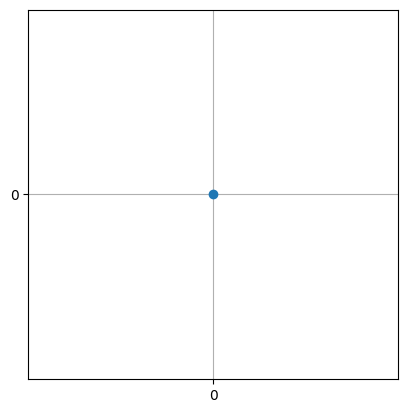

2:[19 16 15 15 14 14  9  8  6  3]->[0 1]


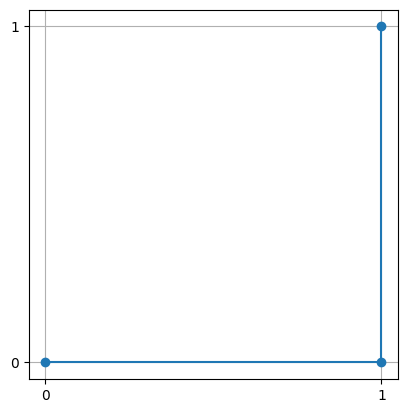

3:[17 15 15 13 10  9  9  9  6  6]->[0 1 0 1]


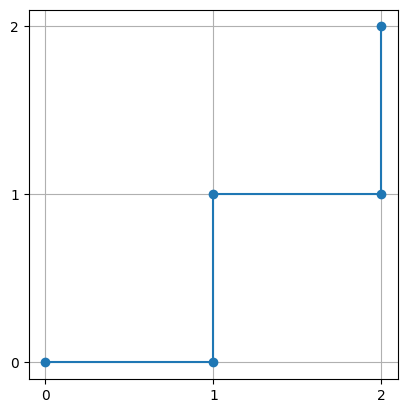

4:[18 17 17 17 15 13 12  9  7  4]->[0 1 0 1]


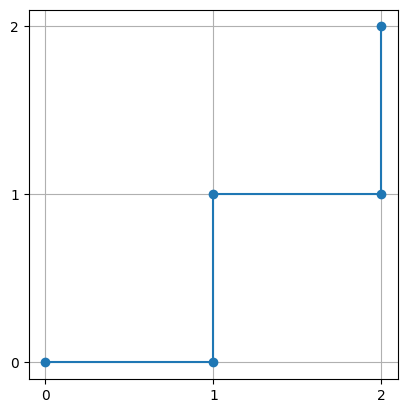

5:[18 18 16 16 10 10  8  7  5  4]->[]


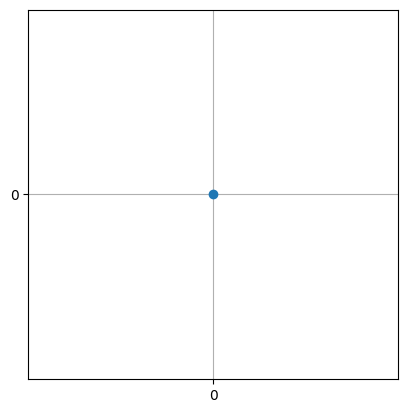

In [148]:
for i in range(n):
  X=rand(height, 1, width_max)
  result=show(t_core(X,t))

  print(f"{i+1}:{X}->{result}")

  x_points = [0]
  y_points = [0]

  x, y = 0, 0

  for val in result:
      if val == 0:
          x += 1
      else:
          y += 1

      x_points.append(x)
      y_points.append(y)

  fig, ax = plt.subplots()
  ax.plot(x_points, y_points, marker='o')
  ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
  ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
  ax.set_aspect('equal')
  ax.grid()
  plt.show()

段が１の階段状になっている

##t=3のとき

In [149]:
t=3
n=5
width_max=20
height=10

1:[17 12  9  8  8  7  6  5  3  2]->[0 1 1 0 1 1 0 1 1 0 0 1]


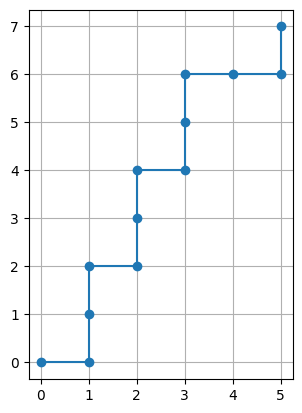

2:[18 14 12 11  7  5  5  4  4  2]->[0 1 1 0 1]


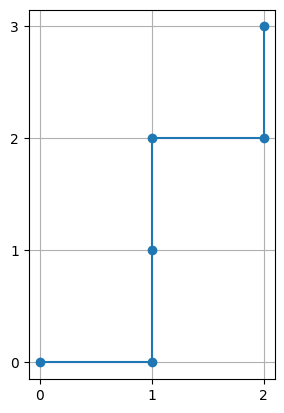

3:[18 17 16 14 14 12 11  5  4  3]->[0 1 1 0 1 1]


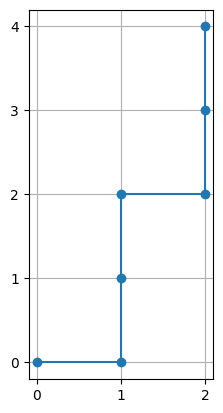

4:[19 16 13  8  7  7  6  6  6  2]->[0 1 0 0 1 0 0 1]


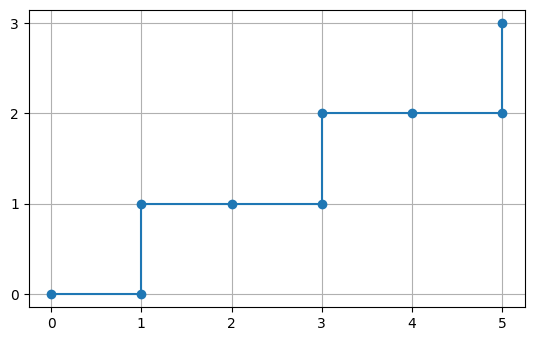

5:[17 17 15 13 12 10  9  4  3  3]->[0 1]


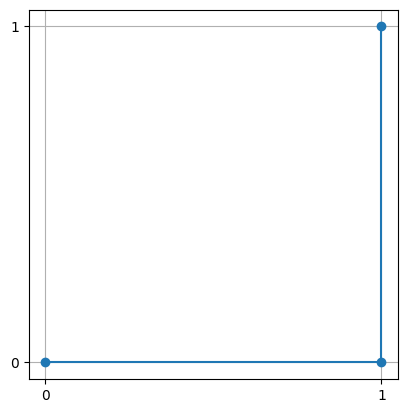

In [150]:
for i in range(n):
  X=rand(height, 1, width_max)
  result=show(t_core(X,t))

  print(f"{i+1}:{X}->{result}")

  x_points = [0]
  y_points = [0]

  x, y = 0, 0

  for val in result:
      if val == 0:
          x += 1
      else:
          y += 1

      x_points.append(x)
      y_points.append(y)

  fig, ax = plt.subplots()
  ax.plot(x_points, y_points, marker='o')
  ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
  ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
  ax.set_aspect('equal')
  ax.grid()
  plt.show()

## t=10のとき

In [155]:
t=10
n=5
width_max=50
height=20

1:[49 47 46 43 43 43 41 39 38 27 24 21 21 16  8  7  7  2  2  1]->[0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1]


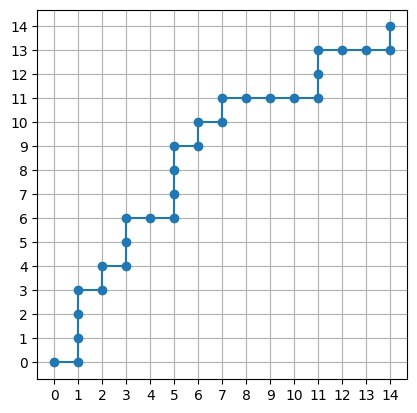

2:[42 42 41 41 40 38 38 32 31 28 27 23 21 19 18 14 13 13 10  3]->[0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1]


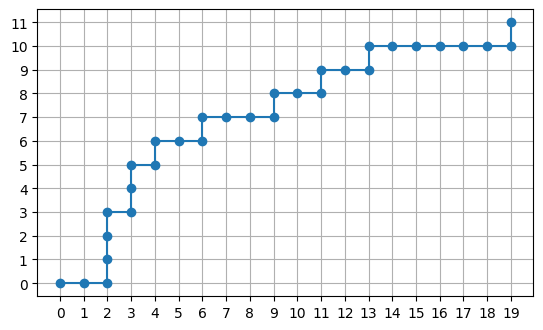

3:[48 46 44 41 39 37 36 36 34 32 30 21 21 18 17 15 11 10  3  1]->[0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1]


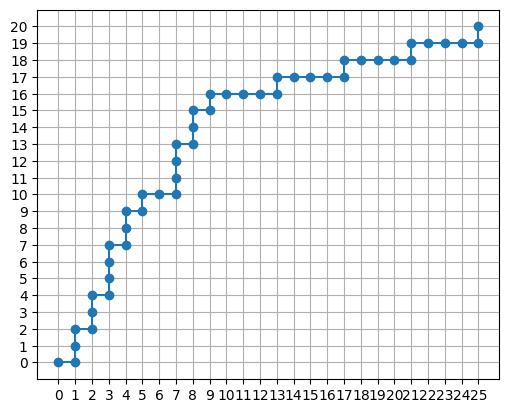

4:[48 48 46 44 40 40 28 26 26 24 23 18 15 11 10  7  4  4  1  1]->[0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1]


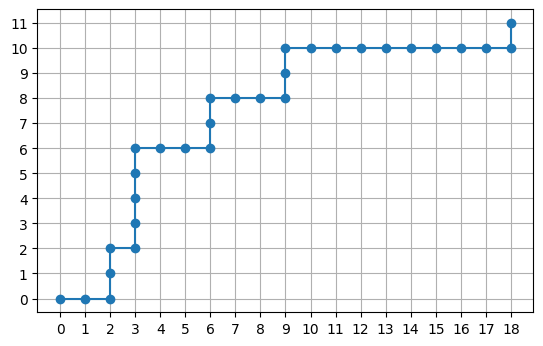

5:[48 48 45 43 42 42 41 39 32 31 31 30 29 28 25 24 16 13 11 11]->[0 1 0 1 1 1 1 0 1 0 0 0 0 1]


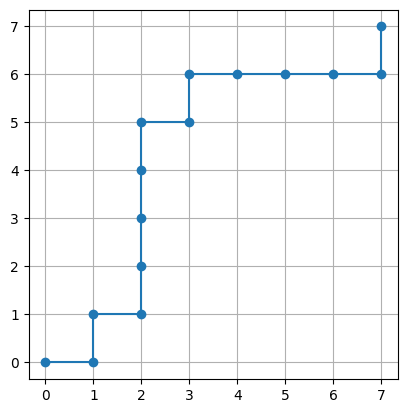

In [156]:
for i in range(n):
  X=rand(height, 1, width_max)
  result=show(t_core(X,t))

  print(f"{i+1}:{X}->{result}")

  x_points = [0]
  y_points = [0]

  x, y = 0, 0

  for val in result:
      if val == 0:
          x += 1
      else:
          y += 1

      x_points.append(x)
      y_points.append(y)

  fig, ax = plt.subplots()
  ax.plot(x_points, y_points, marker='o')
  ax.set_xticks(np.arange(0,x_points[-1]+1, 1))
  ax.set_yticks(np.arange(0,y_points[-1]+1, 1))
  ax.set_aspect('equal')
  ax.grid()
  plt.show()